In [49]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# read in data

df_wsm = pd.read_csv('wsm.csv')
df_yem = pd.read_csv('yem.csv')
df_zaf = pd.read_csv('zaf.csv')
df_zmb = pd.read_csv('zmb.csv')
df_zwe = pd.read_csv('zwe.csv')

df = pd.concat([df_wsm,df_yem,df_zaf,df_zmb,df_zwe], ignore_index=True) 

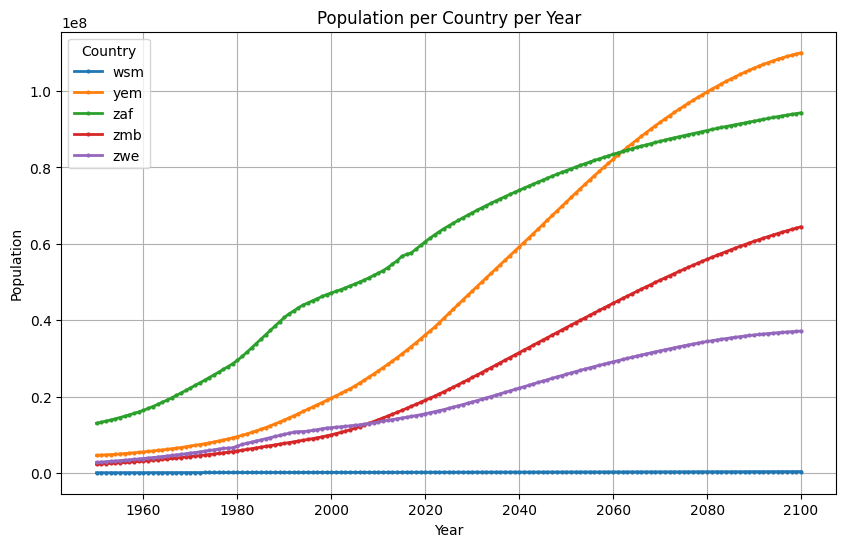

In [50]:
### Create a line plot comparing total population over time:
# choose 5 countries: wsm, yem, zaf, zmb, zwe 

# total population by country for each year

# groups by year and sums the population values of each group 
df_pop = df.groupby(['country', 'year'])['population'].sum().reset_index()
df_pop = df_pop.sort_values(['country', 'year'])
# display(df_pop.head()) 

# Line plot showing population trends
# Include a legend 
plt.figure(figsize=(10, 6))

for country,data in df_pop.groupby('country'):
    plt.plot(
        data["year"],
        data["population"],
        marker = 'o',
        markersize=2,
        linewidth=2,
        label = country
)

plt.title('Population per Country per Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid()


plt.legend(title='Country')
plt.show() 

/tmp/ipykernel_12109/2420496093.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDates.loc[:,'Age Group'] = pd.cut(df['age'], bins=ageDist, labels=ageLabels) # categorizes ages from the age column into the groups specified in ageDist and assigns it to new column Age Group in the new datafarme dfDates


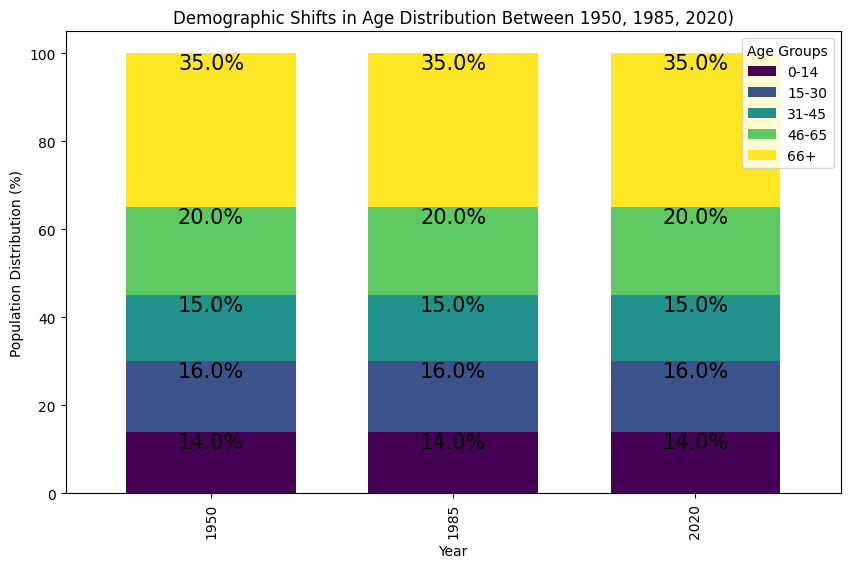

In [51]:
## create a stacked barplot 

ageDist = [0, 14, 30, 45, 65, float('inf')] # create the age distribution categories, float('inf) means infinity to accommodate 66+
ageLabels = ['0-14', '15-30', '31-45', '46-65', '66+']

dfDates = df[df['year'].isin([1950, 1985, 2020])] # filter dataframe for just 1950, 1985, and 2020 
 
dfDates.loc[:,'Age Group'] = pd.cut(df['age'], bins=ageDist, labels=ageLabels) # categorizes ages from the age column into the groups specified in ageDist and assigns it to new column Age Group in the new datafarme dfDates

# group by year and age columns and count all possible combinations, any missing combinations are filled with 0 
ageCounts = dfDates.groupby(['year', 'Age Group'], observed = False).size().unstack(fill_value=0)
# calculate percentage distribution of each group per year dividing the count of each age group by total count for that year
ageCountsPercent = ageCounts.div(ageCounts.sum(axis=1), axis=0) * 100 

# create subplots of these dimensions 
fig, dimensions = plt.subplots(figsize=(10, 6))


ageCountsPercent.plot(kind = 'bar',
                   stacked = True,
                   colormap = 'viridis',
                   ax = dimensions,
                   width = 0.7)

plt.title("Demographic Shifts in Age Distribution Between 1950, 1985, 2020)")
plt.xlabel("Year")
plt.ylabel("Population Distribution (%)")
plt.legend(title="Age Groups")

# loop through each bar on the plot
for percent in dimensions.patches:
    # get the height of the bar which is the same as the percentage 
    height = percent.get_height()
    # specifies where to print the pecentage on each bar 
    dimensions.annotate(f'{height:.1f}%', 
                (percent.get_x() + percent.get_width() / 2., percent.get_y() + height), 
                ha='center', va='top', fontsize=15, color = 'black')

plt.show()


Text(0.5, 1.0, 'Correlation Heatmap of Age Distribution Across 5 Countries in 2020')

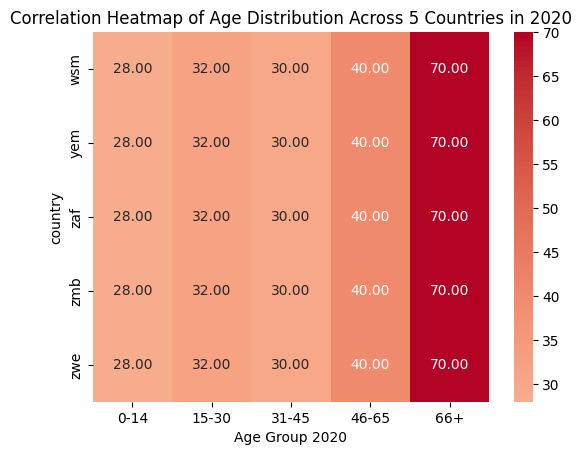

In [ ]:
# Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.

ageDist = [0, 14, 30, 45, 65, float('inf')] 
ageLabels = ['0-14', '15-30', '31-45', '46-65', '66+']

specifyYear = df[df['year'] == 2020].copy() # filter for just 2020 

# create new column Age Group 2020 based on age column 
specifyYear.loc[:,'Age Group 2020'] = pd.cut(specifyYear['age'], bins=ageDist, labels=ageLabels) 

# have to create contingency table as we are looking at 2 categorical columns 
contingencyTable = pd.crosstab(specifyYear['country'], specifyYear['Age Group 2020']) 

ageCountryDist = sns.heatmap(contingencyTable, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')

ageCountryDist.set_title('Correlation Heatmap of Age Distribution Across 5 Countries in 2020')

Write a brief explanation of what the heatmap reveals about the population structure 

In [ ]:
# 2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
#    - Create side-by-side violin plots using seaborn
#    - Add clear labels and a title
#    - Write a brief comparison of what the plots reveal 

gender_ratio = df.groupby('year').agg({
    'population': lambda x: x[df['gender']=='f'].sum() / x[df['gender']=='m'].sum()
}) 

ax = sns.violinplot(data=df, x='Age Group 2020', y='country')
ax.set_title('Blood Pressure Distribution by Age Group')

/tmp/ipykernel_12109/465010196.py:7: RuntimeWarning: invalid value encountered in scalar divide
  'population': lambda x: x[df['gender']=='f'].sum() / x[df['gender']=='m'].sum()
/tmp/ipykernel_12109/465010196.py:7: RuntimeWarning: invalid value encountered in scalar divide
  'population': lambda x: x[df['gender']=='f'].sum() / x[df['gender']=='m'].sum()
/tmp/ipykernel_12109/465010196.py:7: RuntimeWarning: invalid value encountered in scalar divide
  'population': lambda x: x[df['gender']=='f'].sum() / x[df['gender']=='m'].sum()
/tmp/ipykernel_12109/465010196.py:7: RuntimeWarning: invalid value encountered in scalar divide
  'population': lambda x: x[df['gender']=='f'].sum() / x[df['gender']=='m'].sum()
/tmp/ipykernel_12109/465010196.py:7: RuntimeWarning: invalid value encountered in scalar divide
  'population': lambda x: x[df['gender']=='f'].sum() / x[df['gender']=='m'].sum()
/tmp/ipykernel_12109/465010196.py:7: RuntimeWarning: invalid value encountered in scalar divide
  'population'

In [54]:
# 3. Create a pairplot comparing population metrics across four countries:
#    - Select four countries of your choice
#    - Include all variables in the dataset
#    - Use the country as the hue parameter to distinguish between countries
#    - Write a brief summary of any patterns or relationships revealed by the pairplot